In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(10)

In [18]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [19]:
from ps1_functions import problem2_evaluate_function_on_random_noise, problem2_fit_polynomial, problem3_knn_classifier

# Problem 1

N = 15; 100 and sigma = 0; 0:05; 0:2
generate problem2_evaluate_function_on_random_noise with

## Problem 1a

In [20]:
data_15_0 = problem2_evaluate_function_on_random_noise(15, 0)
data_15_005 = problem2_evaluate_function_on_random_noise(15, 0.05)
data_15_02 = problem2_evaluate_function_on_random_noise(15, 0.2)
data_100_0 = problem2_evaluate_function_on_random_noise(100, 0)
data_100_005 = problem2_evaluate_function_on_random_noise(100, 0.05)
data_100_02 = problem2_evaluate_function_on_random_noise(100, 0.2)

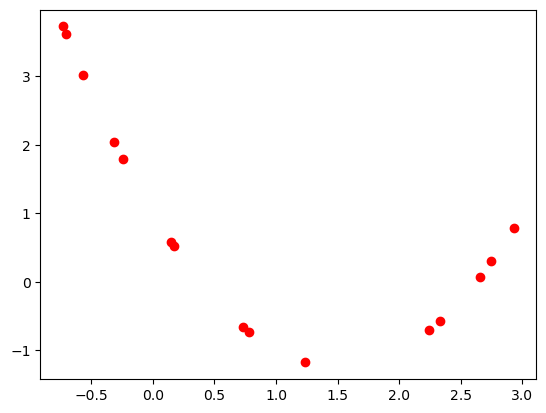

In [21]:
plt.plot(data_15_0[0], data_15_0[1], 'ro')

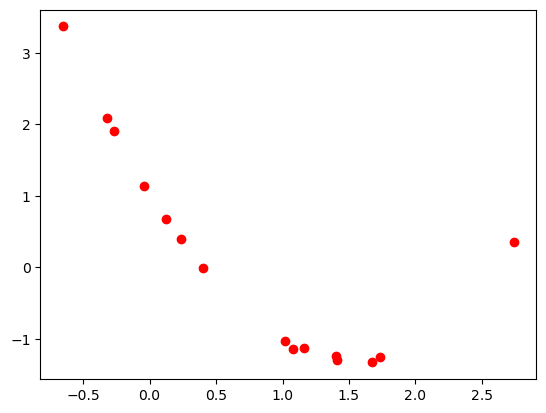

In [22]:
plt.plot(data_15_005[0], data_15_005[1], 'ro')

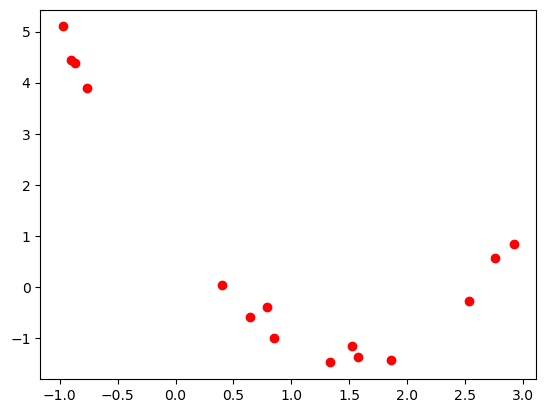

In [23]:
plt.plot(data_15_02[0], data_15_02[1], 'ro')

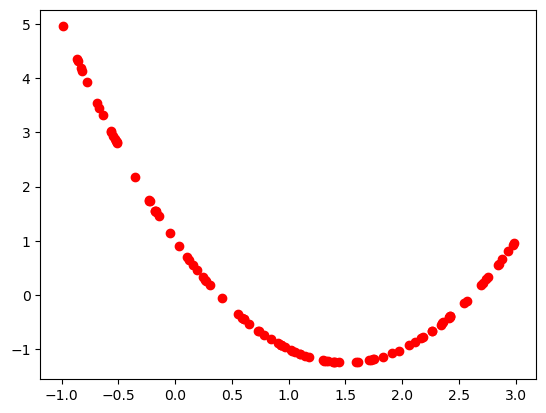

In [24]:
plt.plot(data_100_0[0], data_100_0[1], 'ro')

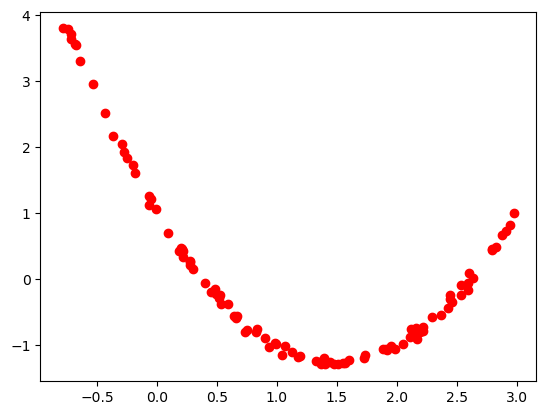

In [25]:
plt.plot(data_100_005[0], data_100_005[1], 'ro')

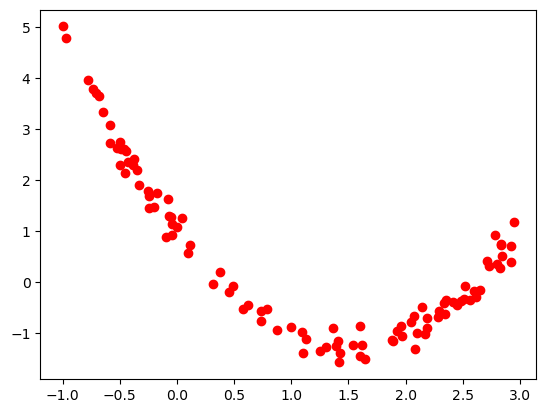

In [26]:
plt.plot(data_100_02[0], data_100_02[1], 'ro')

## 1b

In [30]:
def plot_fitted_polynomial(data_x, data_y, degree, regularisation=0):
    
    coeffs = problem2_fit_polynomial(data_x, data_y, degree, regularisation)
    #plot polynomial with weights w on top of data
    plot_x = np.linspace(-1, 3, 100)
    plot_y = np.array([sum([w_i * x_i ** n for n, w_i in enumerate(coeffs)]) for x_i in plot_x])
    plt.plot(plot_x, plot_y, 'b-')

    #plot  on top
    plt.plot(data_x, data_y, 'ro')

    #plot polynomial with weights w on top of data
    predicted_y = np.array([sum([w_i * x_i ** n for n, w_i in enumerate(coeffs)]) for x_i in data_x])
    #MSE between predicted_y and data_y 
    mse = np.mean((predicted_y - data_y) ** 2)

    #add mse to plot
    plt.title("degrees: "+ str(degree) +" MSE: " + str(mse))

    #print("MSE: ", mse)
    return mse, coeffs

n_sample:  15 noise:  0


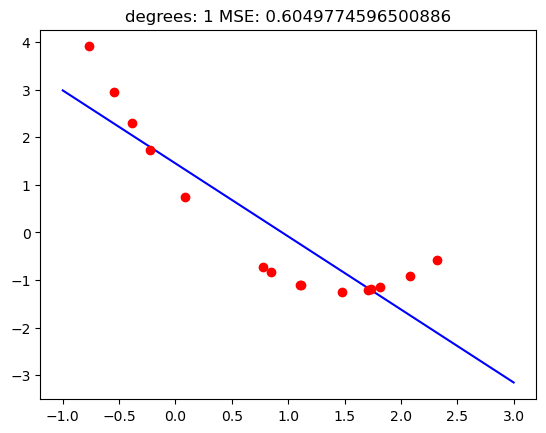

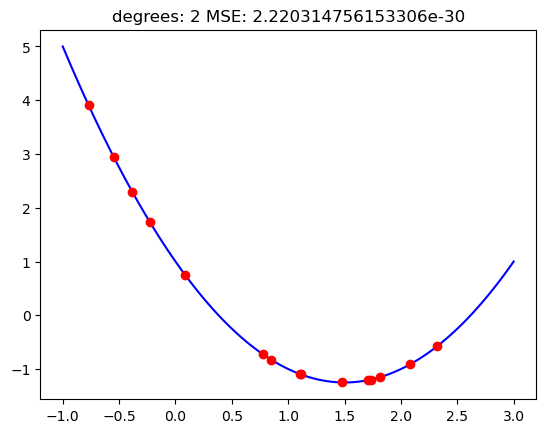

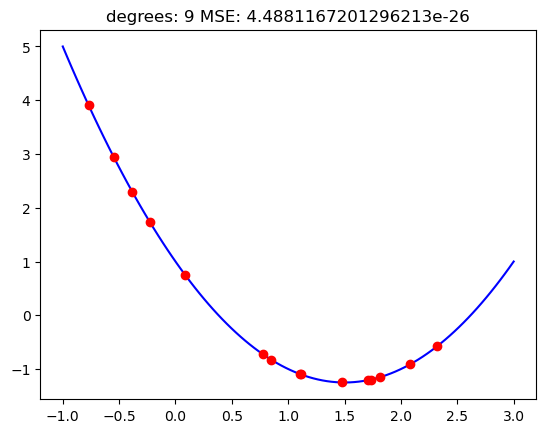

n_sample:  15 noise:  0.05


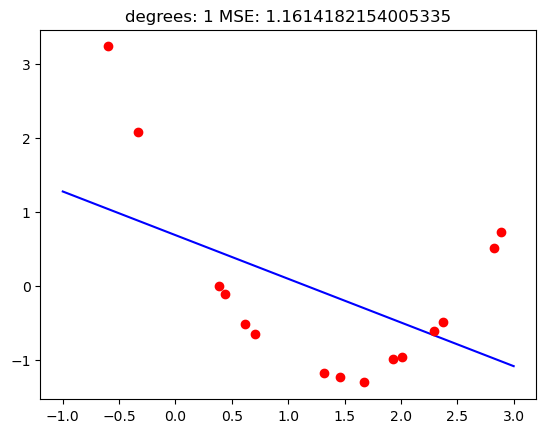

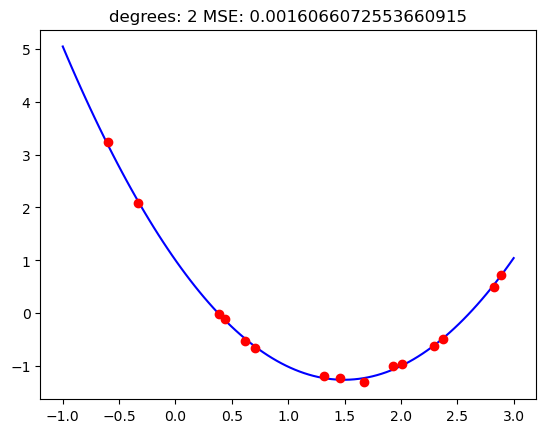

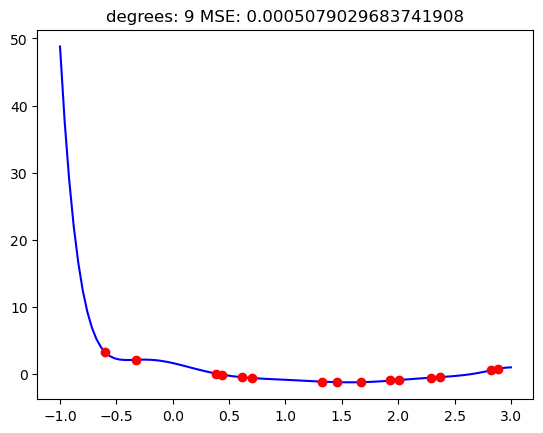

n_sample:  15 noise:  0.2


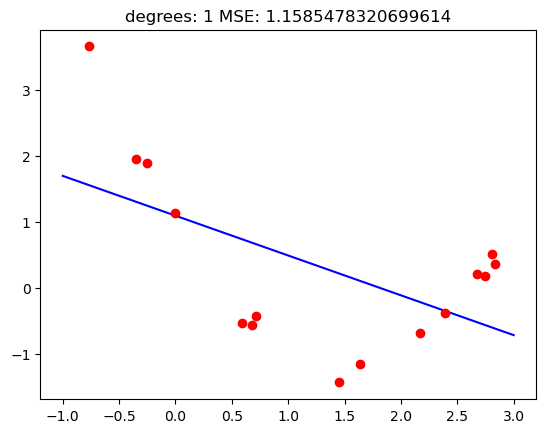

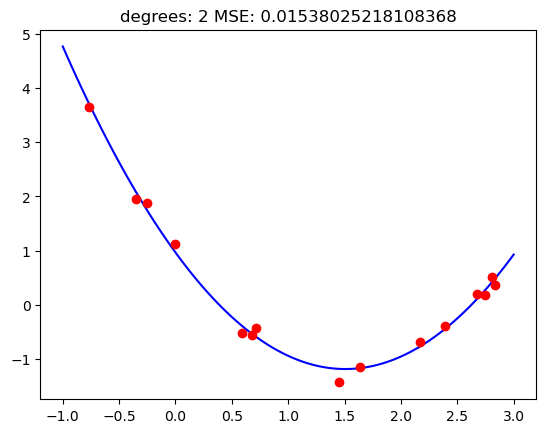

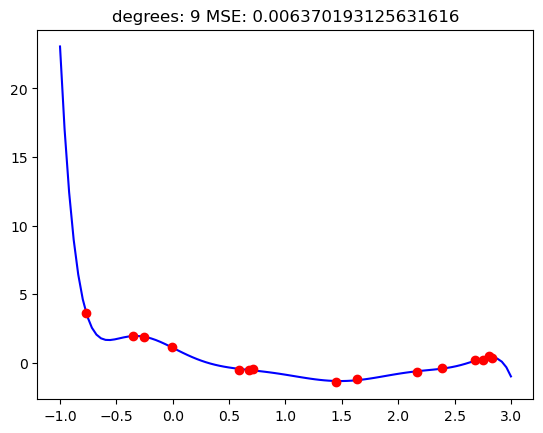

n_sample:  100 noise:  0


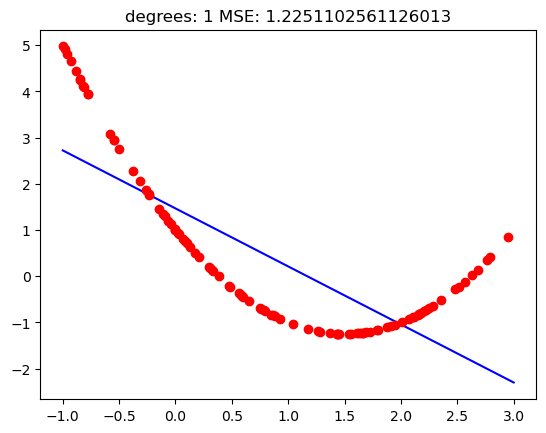

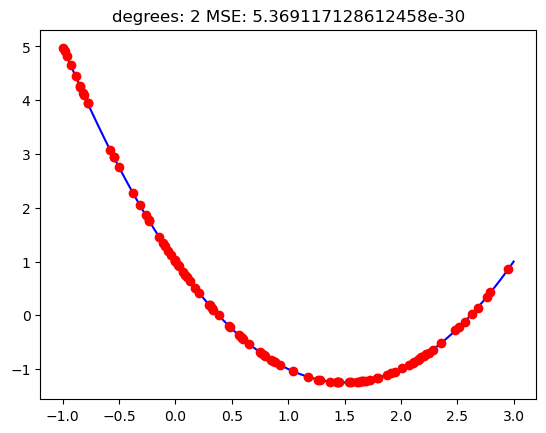

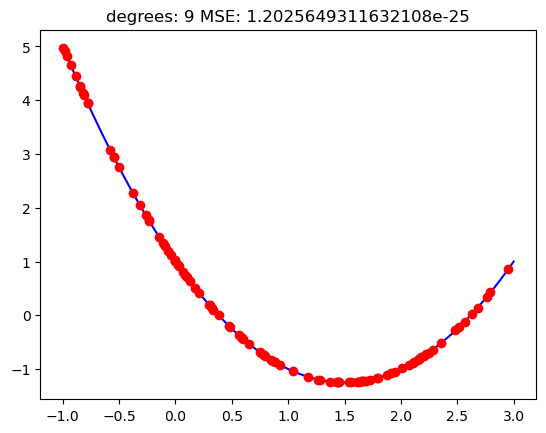

n_sample:  100 noise:  0.05


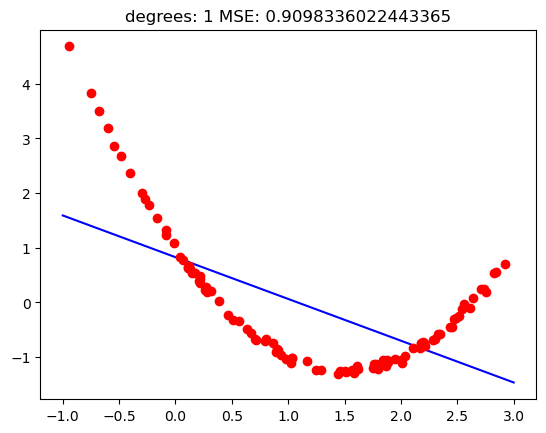

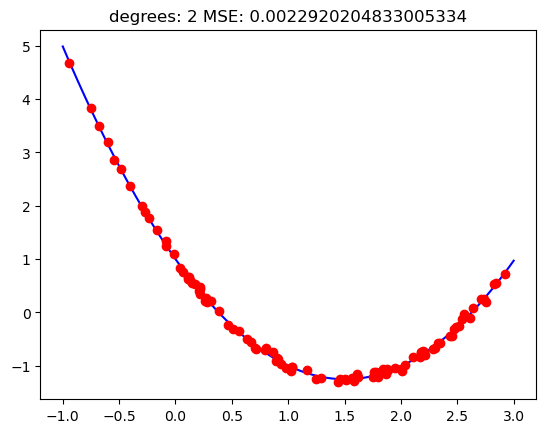

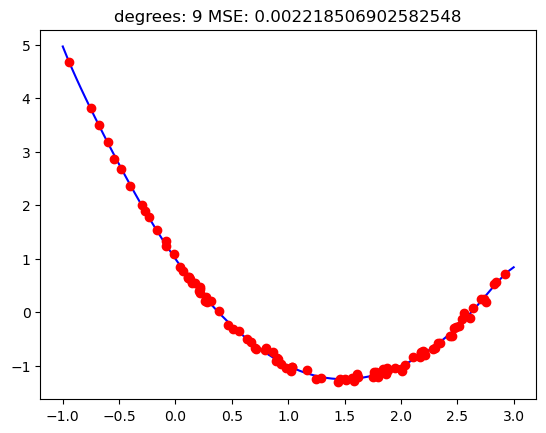

n_sample:  100 noise:  0.2


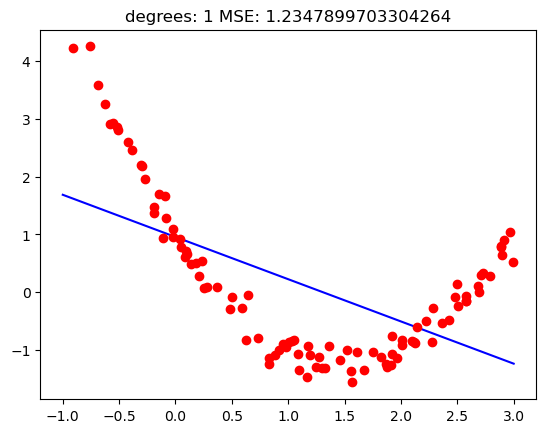

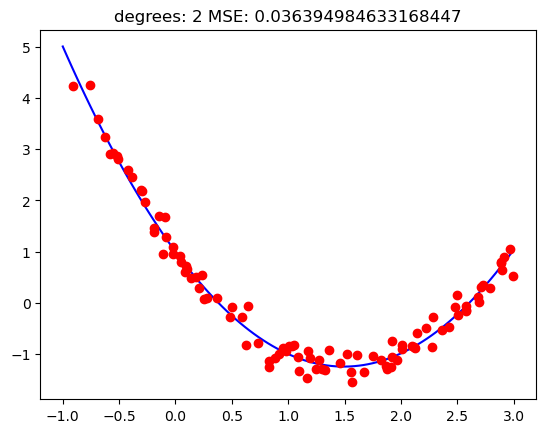

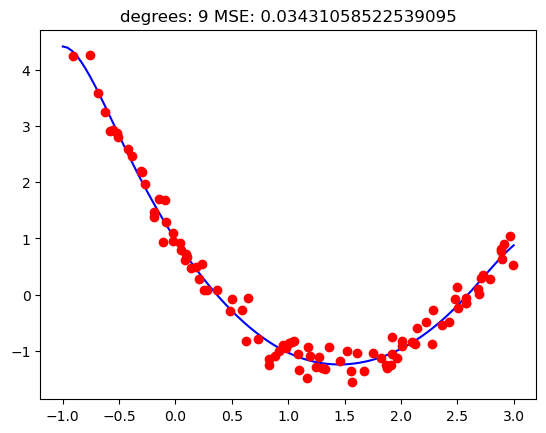

In [28]:
#create empty list
list_performance = list()

for n_sample in [15, 100]:
    for noise in [0, 0.05, 0.2]:
        data = problem2_evaluate_function_on_random_noise(n_sample, noise)
        print("n_sample: ", n_sample, "noise: ", noise)
        for degree in [1,2,9]:
            mse, coeffs = plot_fitted_polynomial(data[0], data[1], degree)
            #add mse, coeffs tupel to list
            list_performance.append((n_sample, noise, degree, mse, coeffs))
            plt.show()

In [29]:
pd.DataFrame(list_performance, columns=["n_sample", "noise", "degree", "mse", "coeffs"])

,n_sample,noise,degree,mse,coeffs
0,15,0.00,1,6.049775e-01,"[1.4495791709278822, -1.5345579012884125]"
1,15,0.00,2,2.220315e-30,"[0.9999999999999993, -2.9999999999999996, 0.99..."
2,15,0.00,9,4.488117e-26,"[1.0000000000000326, -2.999999999999991, 0.999..."
3,15,0.05,1,1.161418e+00,"[0.6827064632973369, -0.5896738056488976]"
4,15,0.05,2,1.606607e-03,"[1.0027884541318342, -3.0250115711919543, 1.01..."
5,15,0.05,9,5.079030e-04,"[1.5889338882040074, -3.76891809489266, -4.676..."
6,15,0.20,1,1.158548e+00,"[1.0926939472731747, -0.6029845276494474]"
7,15,0.20,2,1.538025e-02,"[0.9660500482097839, -2.8552093446766404, 0.94..."
8,15,0.20,9,6.370193e-03,"[1.095110103943743, -4.120195862712675, -0.556..."
9,100,0.00,1,1.225110e+00,"[1.467998183832818, -1.255632053503664]"


2c

n_sample:  15 noise:  0.05
regularisation:  0


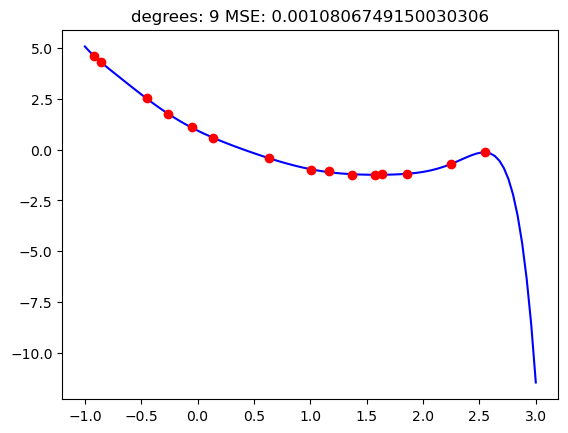

regularisation:  0.01


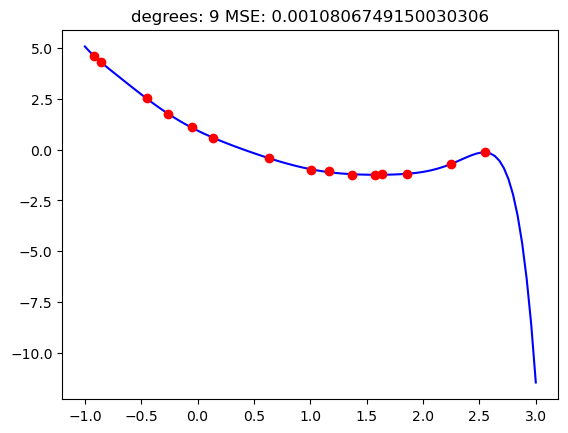

regularisation:  0.1


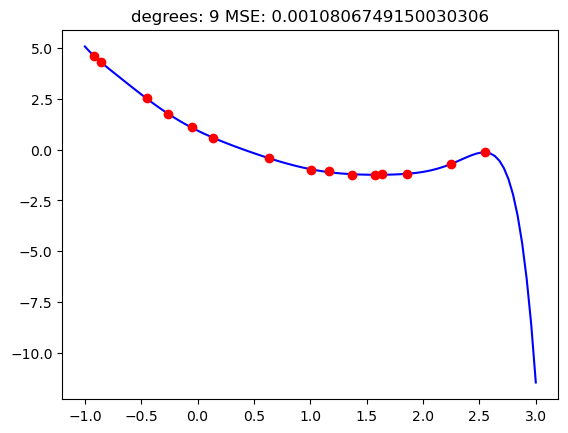

regularisation:  1


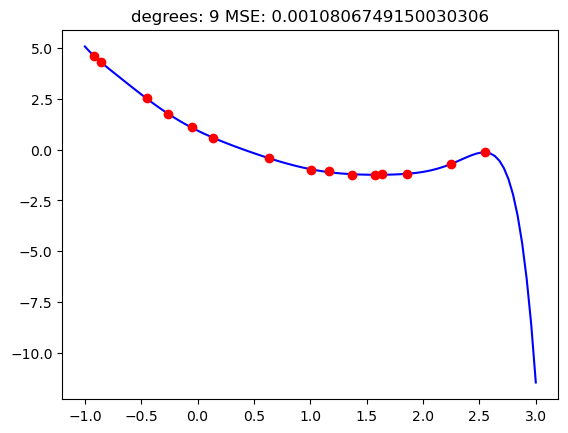

regularisation:  10


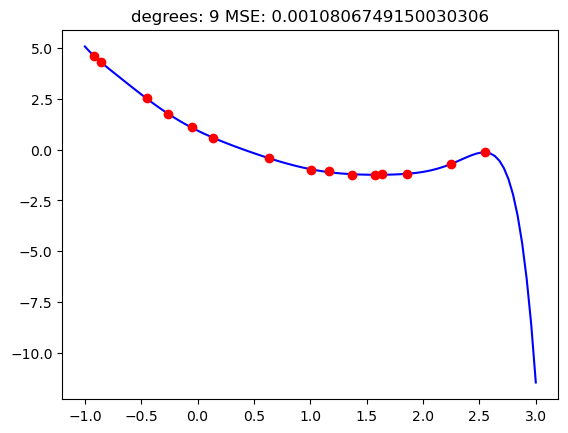

regularisation:  100


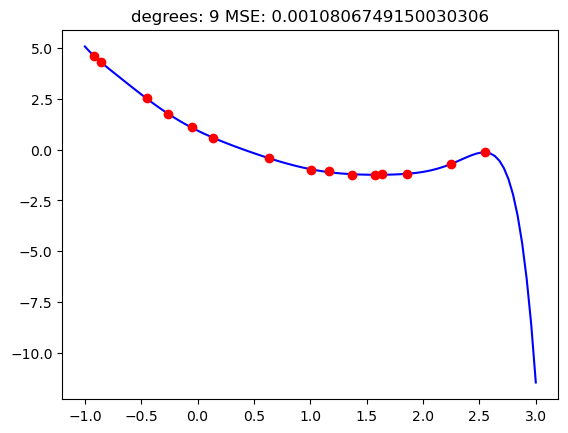

regularisation:  1000


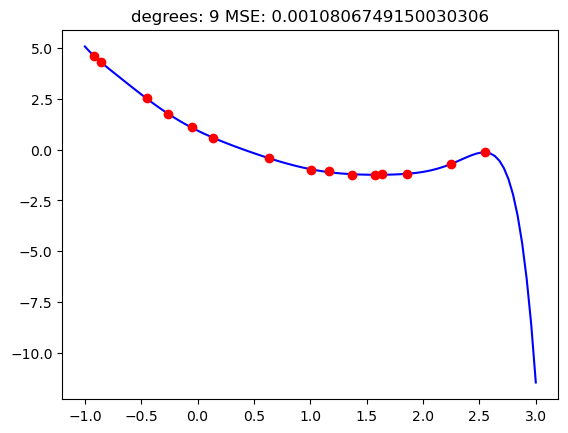

n_sample:  100 noise:  0.05
regularisation:  0


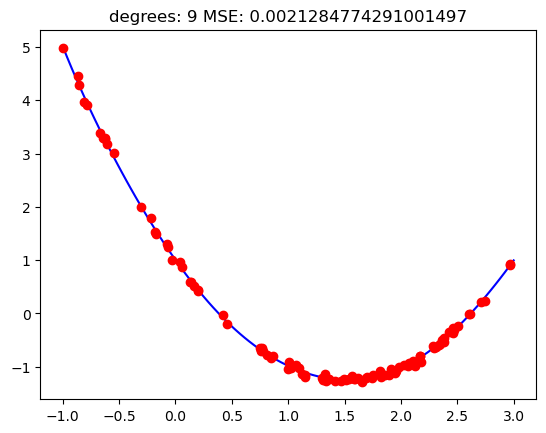

regularisation:  0.01


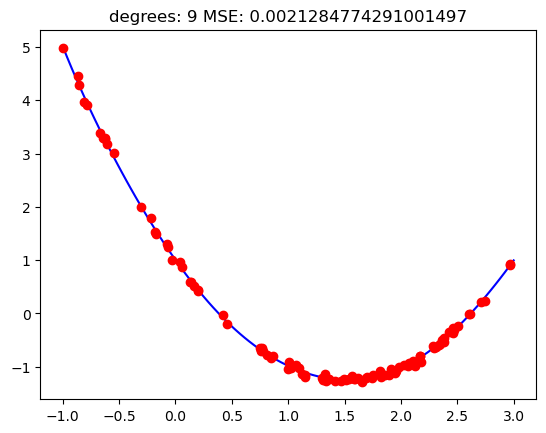

regularisation:  0.1


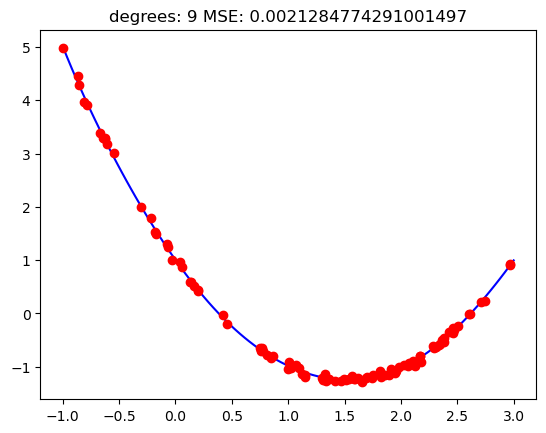

regularisation:  1


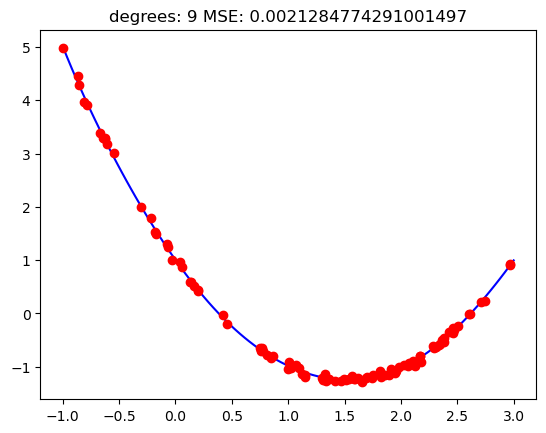

regularisation:  10


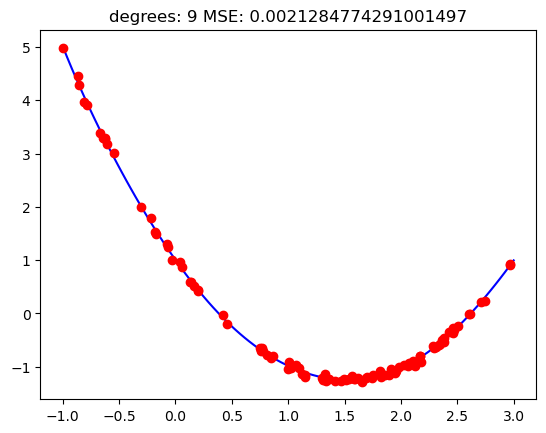

regularisation:  100


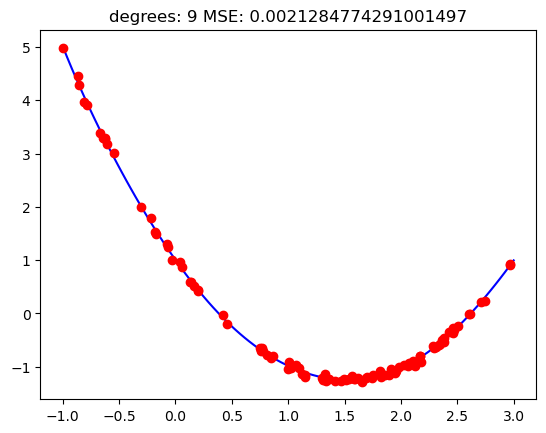

regularisation:  1000


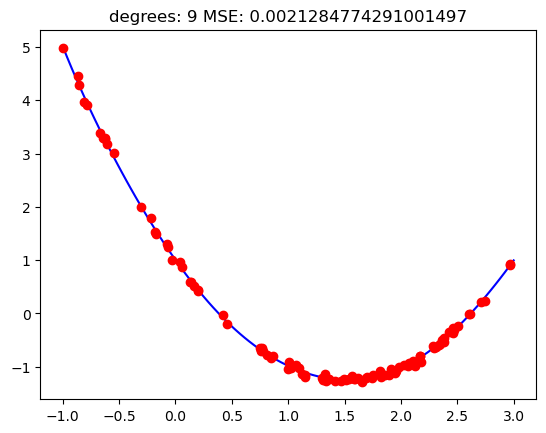

In [35]:
#create empty list
list_performance = list()

for n_sample in [15, 100]:
    for noise in [0.05]:
        data = problem2_evaluate_function_on_random_noise(n_sample, noise)
        print("n_sample: ", n_sample, "noise: ", noise)
        for degree in [9]:
            for regularisation in [0, 0.01, 0.1, 1, 10, 100, 1000]:
                print("regularisation: ", regularisation)
                mse, coeffs = plot_fitted_polynomial(data[0], data[1], degree, regularisation)
                #add mse, coeffs tupel to list
                list_performance.append((n_sample, noise, degree, regularisation, mse, coeffs))
                plt.show()
           